Data read done
Specify test features done
Spliting data done
Fit model done
Prediction done
Mean absolute Error:  54.36612424053265
Creating DataFrame done


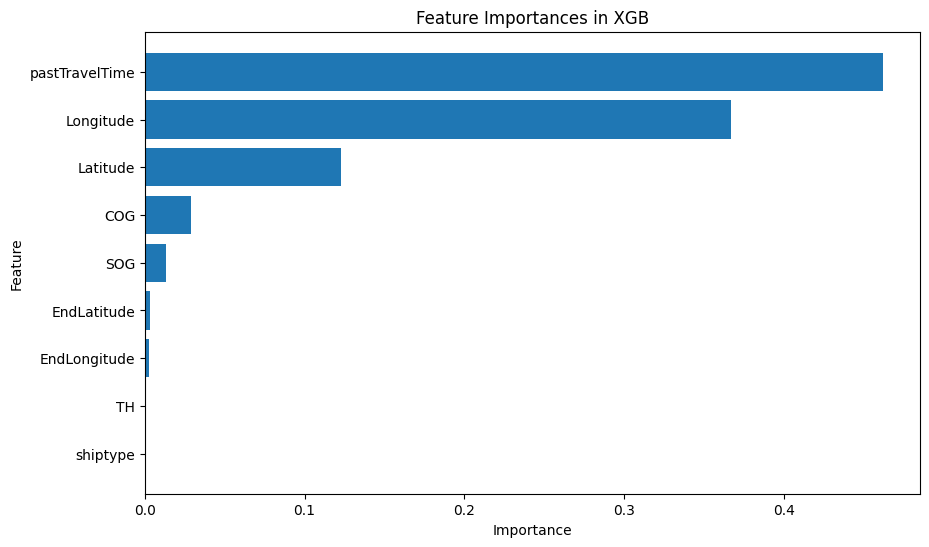

Plotting feature importance done


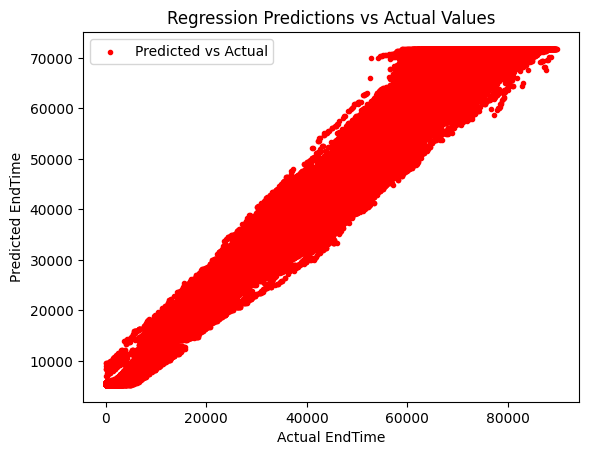

Plotting results done
All done


In [3]:
import pandas as pd
import numpy as np
import sys 
from numpy import mean, std
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
import xgboost as xgb


#use given csv data for the model
data = pd.read_csv("../../data/RotHam_cleaned/rotterdam_hamburg_clean.csv", on_bad_lines="warn")
print('Data read done')

#specify test features
test_features = [ "COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"]
print('Specify test features done')

#specify test and training sets
#Random state is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices
y = data["timeTillArrival"]
X = data[["Latitude", "Longitude", "SOG"] + test_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Spliting data done')

#choose XGBRegressor as model and train it with the train split sets
model = xgb.XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=3, min_child_weight=3, subsample=0.8, colsample_bytree=0.8, gamma=0.1, reg_alpha=0.1, reg_lambda=0.1, objective='reg:squarederror', random_state=42)

model.fit(X_train,y_train)
print('Fit model done')
#use fractions of data for prediction
y_pred = model.predict(X_test)
print('Prediction done')

#Evaluate the model (Perfect MAE = 0)
#Give out MAE of the prediction set compared to the test set
#MAE in minutes
mse = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error: ' , mse/60)

importances = model.feature_importances_
features = X.columns

#Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print('Creating DataFrame done')

#Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in XGB')
plt.gca().invert_yaxis()
plt.show()
print('Plotting feature importance done')

#Visualize the results
plt.scatter(y_test,y_pred, marker='.',color='red', label='Predicted vs Actual')  # type: ignore
plt.xlabel('Actual EndTime')
plt.ylabel('Predicted EndTime')
plt.title('Regression Predictions vs Actual Values')
plt.legend()
plt.show()
print('Plotting results done')


X_train_minimized = X_train.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"], axis=1)
X_test_minimized = X_test.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"], axis=1)
print('All done')


Data read done
Specify test features done
Spliting data done
Fit model done
Prediction done
Mean absolute Error:  23.92783431850636
Creating DataFrame done


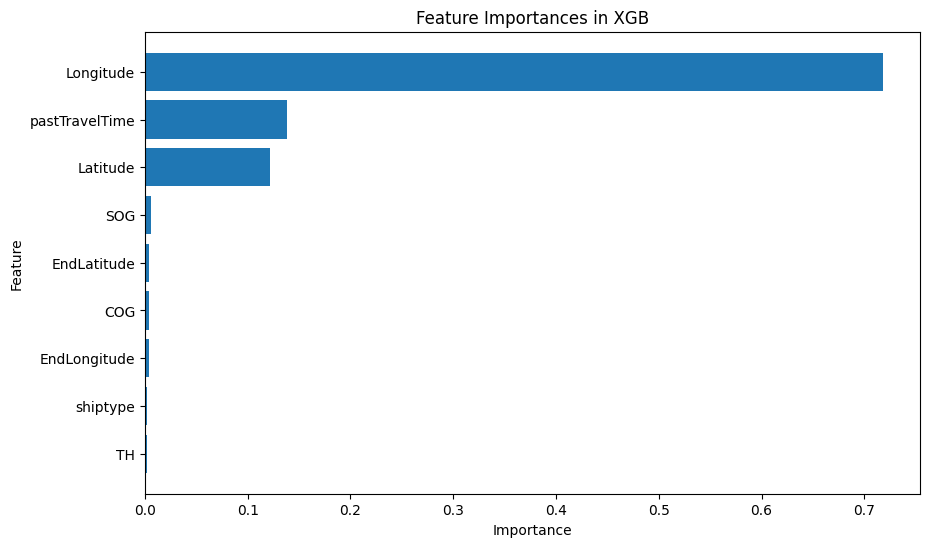

Plotting feature importance done


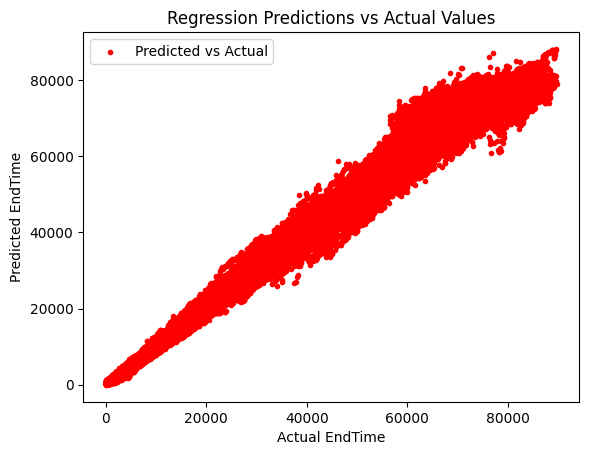

Plotting results done
All done


In [4]:
import pandas as pd
import numpy as np
import sys 
from numpy import mean, std
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
import xgboost as xgb


#use given csv data for the model
data = pd.read_csv("../../data/RotHam_cleaned/rotterdam_hamburg_clean.csv", on_bad_lines="warn")
print('Data read done')

#specify test features
test_features = [ "COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"]
print('Specify test features done')

#specify test and training sets
#Random state is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices
y = data["timeTillArrival"]
X = data[["Latitude", "Longitude", "SOG"] + test_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Spliting data done')

#choose XGBRegressor as model and train it with the train split sets
model = xgb.XGBRegressor(n_estimators=150, learning_rate=0.05, max_depth=10, min_child_weight=3, subsample=0.8, colsample_bytree=0.8, gamma=0.1, reg_alpha=0.1, reg_lambda=0.1, objective='reg:squarederror', random_state=42)

model.fit(X_train,y_train)
print('Fit model done')
#use fractions of data for prediction
y_pred = model.predict(X_test)
print('Prediction done')

#Evaluate the model (Perfect MAE = 0)
#Give out MAE of the prediction set compared to the test set
#MAE in minutes
mse = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error: ' , mse/60)

importances = model.feature_importances_
features = X.columns

#Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print('Creating DataFrame done')

#Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in XGB')
plt.gca().invert_yaxis()
plt.show()
print('Plotting feature importance done')

#Visualize the results
plt.scatter(y_test,y_pred, marker='.',color='red', label='Predicted vs Actual')  # type: ignore
plt.xlabel('Actual EndTime')
plt.ylabel('Predicted EndTime')
plt.title('Regression Predictions vs Actual Values')
plt.legend()
plt.show()
print('Plotting results done')


X_train_minimized = X_train.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"], axis=1)
X_test_minimized = X_test.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"], axis=1)
print('All done')

Data read done
Specify test features done
Spliting data done
Fit model done
Prediction done
Mean absolute Error:  11.432739934279464
Creating DataFrame done


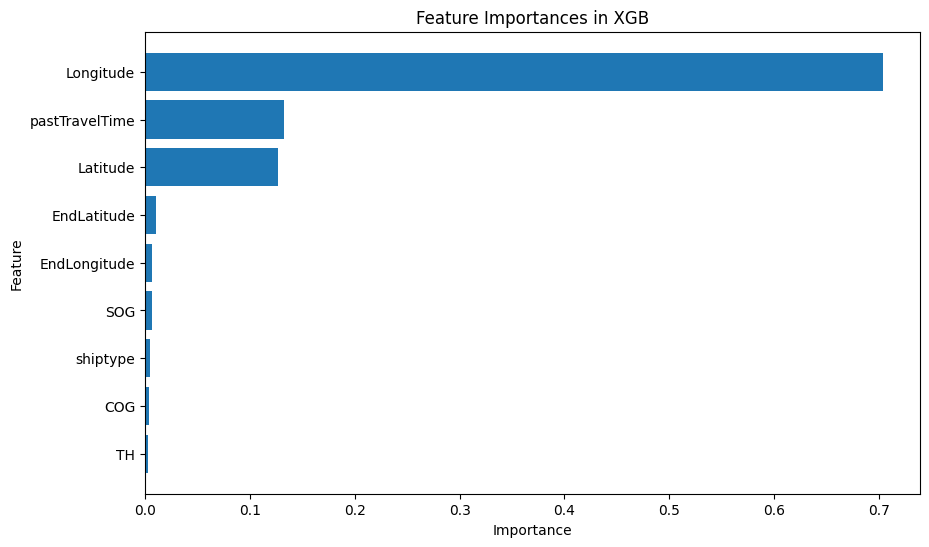

Plotting feature importance done


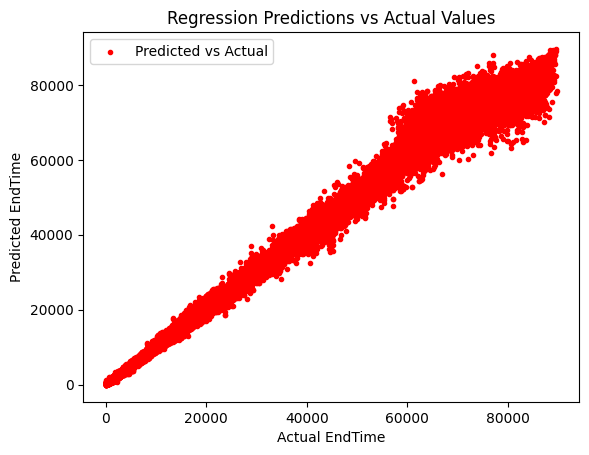

Plotting results done
All done


In [5]:
import pandas as pd
import numpy as np
import sys 
from numpy import mean, std
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
import xgboost as xgb


#use given csv data for the model
data = pd.read_csv("../../data/RotHam_cleaned/rotterdam_hamburg_clean.csv", on_bad_lines="warn")
print('Data read done')

#specify test features
test_features = [ "COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"]
print('Specify test features done')

#specify test and training sets
#Random state is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices
y = data["timeTillArrival"]
X = data[["Latitude", "Longitude", "SOG"] + test_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Spliting data done')

#choose XGBRegressor as model and train it with the train split sets
model = xgb.XGBRegressor(n_estimators=250, learning_rate=0.05, max_depth=15, min_child_weight=3, subsample=0.8, colsample_bytree=0.8, gamma=0.1, reg_alpha=0.1, reg_lambda=0.1, objective='reg:squarederror', random_state=42)

model.fit(X_train,y_train)
print('Fit model done')
#use fractions of data for prediction
y_pred = model.predict(X_test)
print('Prediction done')

#Evaluate the model (Perfect MAE = 0)
#Give out MAE of the prediction set compared to the test set
#MAE in minutes
mse = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error: ' , mse/60)

importances = model.feature_importances_
features = X.columns

#Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print('Creating DataFrame done')

#Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in XGB')
plt.gca().invert_yaxis()
plt.show()
print('Plotting feature importance done')

#Visualize the results
plt.scatter(y_test,y_pred, marker='.',color='red', label='Predicted vs Actual')  # type: ignore
plt.xlabel('Actual EndTime')
plt.ylabel('Predicted EndTime')
plt.title('Regression Predictions vs Actual Values')
plt.legend()
plt.show()
print('Plotting results done')


X_train_minimized = X_train.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"], axis=1)
X_test_minimized = X_test.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"], axis=1)
print('All done')


Data read done
Specify test features done
Spliting data done
Fit model done
Prediction done
Mean absolute Error:  9.374670020209004
Creating DataFrame done


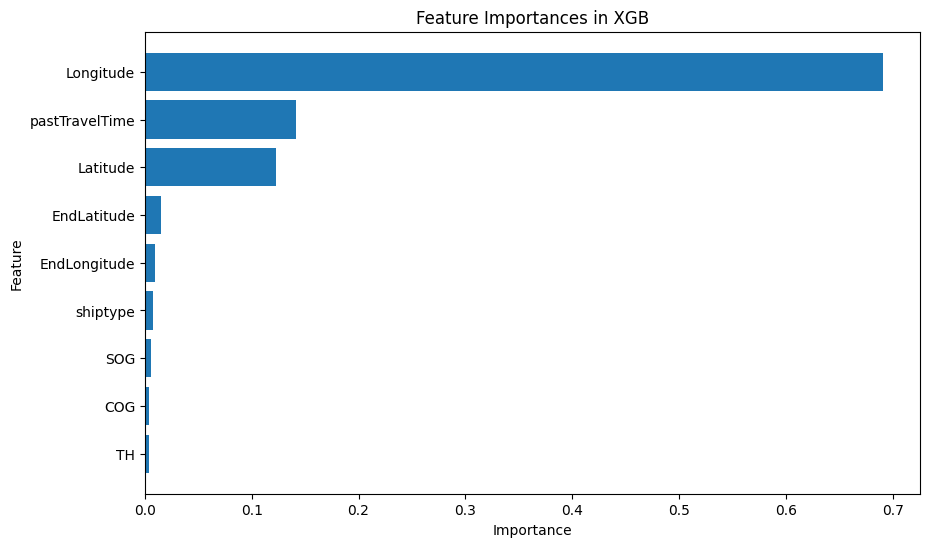

Plotting feature importance done


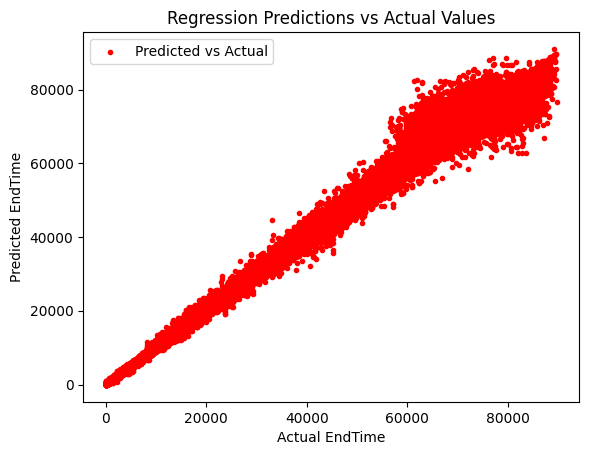

Plotting results done
All done


In [6]:
import pandas as pd
import numpy as np
import sys 
from numpy import mean, std
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
import xgboost as xgb


#use given csv data for the model
data = pd.read_csv("../../data/RotHam_cleaned/rotterdam_hamburg_clean.csv", on_bad_lines="warn")
print('Data read done')

#specify test features
test_features = [ "COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"]
print('Specify test features done')

#specify test and training sets
#Random state is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices
y = data["timeTillArrival"]
X = data[["Latitude", "Longitude", "SOG"] + test_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Spliting data done')

#choose XGBRegressor as model and train it with the train split sets
model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=30, min_child_weight=3, subsample=0.8, colsample_bytree=0.8, gamma=0.1, reg_alpha=0.1, reg_lambda=0.1, objective='reg:squarederror', random_state=42)

model.fit(X_train,y_train)
print('Fit model done')
#use fractions of data for prediction
y_pred = model.predict(X_test)
print('Prediction done')

#Evaluate the model (Perfect MAE = 0)
#Give out MAE of the prediction set compared to the test set
#MAE in minutes
mse = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error: ' , mse/60)

importances = model.feature_importances_
features = X.columns

#Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print('Creating DataFrame done')

#Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in XGB')
plt.gca().invert_yaxis()
plt.show()
print('Plotting feature importance done')

#Visualize the results
plt.scatter(y_test,y_pred, marker='.',color='red', label='Predicted vs Actual')  # type: ignore
plt.xlabel('Actual EndTime')
plt.ylabel('Predicted EndTime')
plt.title('Regression Predictions vs Actual Values')
plt.legend()
plt.show()
print('Plotting results done')


X_train_minimized = X_train.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"], axis=1)
X_test_minimized = X_test.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"], axis=1)
print('All done')

Data read done
Specify test features done
Spliting data done
Fit model done
Prediction done
Mean absolute Error:  9.36671276040969
Creating DataFrame done


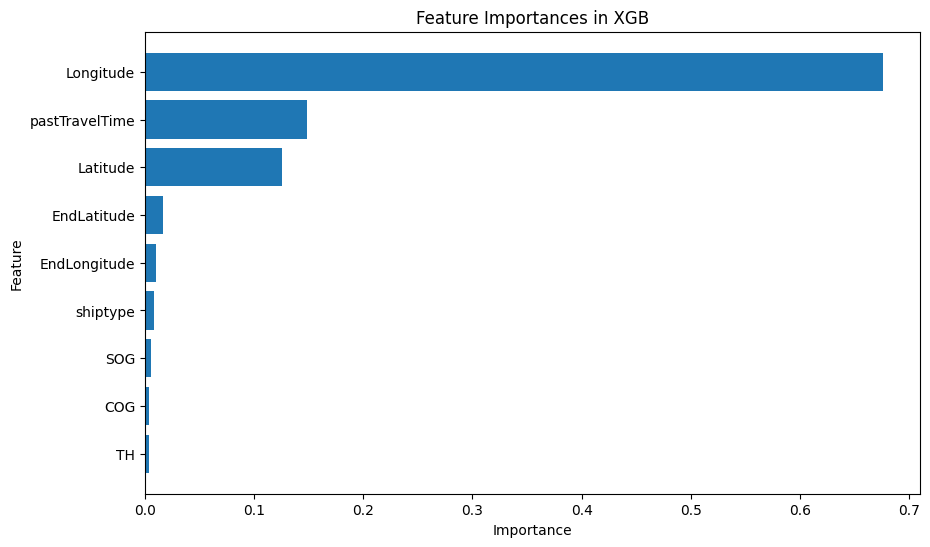

Plotting feature importance done


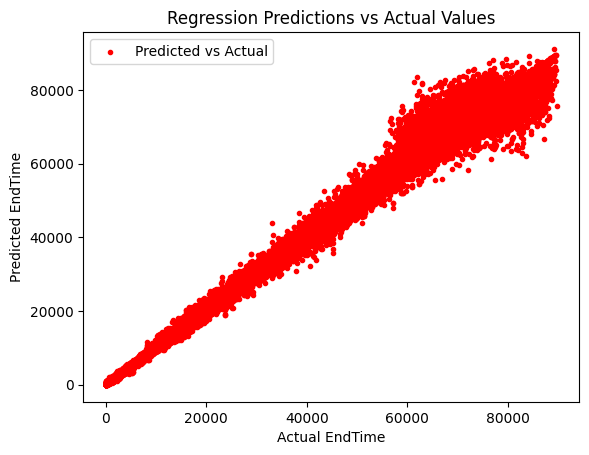

Plotting results done
All done


In [7]:
import pandas as pd
import numpy as np
import sys 
from numpy import mean, std
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
import xgboost as xgb


#use given csv data for the model
data = pd.read_csv("../../data/RotHam_cleaned/rotterdam_hamburg_clean.csv", on_bad_lines="warn")
print('Data read done')

#specify test features
test_features = [ "COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"]
print('Specify test features done')

#specify test and training sets
#Random state is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices
y = data["timeTillArrival"]
X = data[["Latitude", "Longitude", "SOG"] + test_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Spliting data done')

#choose XGBRegressor as model and train it with the train split sets
model = xgb.XGBRegressor(n_estimators=650, learning_rate=0.05, max_depth=40, min_child_weight=3, subsample=0.8, colsample_bytree=0.8, gamma=0.1, reg_alpha=0.1, reg_lambda=0.1, objective='reg:squarederror', random_state=42)

model.fit(X_train,y_train)
print('Fit model done')
#use fractions of data for prediction
y_pred = model.predict(X_test)
print('Prediction done')

#Evaluate the model (Perfect MAE = 0)
#Give out MAE of the prediction set compared to the test set
#MAE in minutes
mse = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error: ' , mse/60)

importances = model.feature_importances_
features = X.columns

#Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print('Creating DataFrame done')

#Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in XGB')
plt.gca().invert_yaxis()
plt.show()
print('Plotting feature importance done')

#Visualize the results
plt.scatter(y_test,y_pred, marker='.',color='red', label='Predicted vs Actual')  # type: ignore
plt.xlabel('Actual EndTime')
plt.ylabel('Predicted EndTime')
plt.title('Regression Predictions vs Actual Values')
plt.legend()
plt.show()
print('Plotting results done')


X_train_minimized = X_train.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"], axis=1)
X_test_minimized = X_test.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"], axis=1)
print('All done')
